# พลอตแผนที่ Synoptic

# การตรวจสอบ geopotential height
* Geopotential (z แทนตัวแปรใน ERA5 มีหน่วย m**2 s**-2) vs Geopotential Height (Z ตัวใหญ่)
* Geopotential เป็นพลังงานศักย์ที่ต้องการต่อหนึ่งหน่วยมวลที่จะสามารถยกก้อนอากาศขึ้นไปเป็นระยะทางหนึ่งหน่วย ภายใต้แรงโน้มถ่วง
* The Geopotential meter (1  meter of geopotential height) หรือ 1 เมตรของ geopotential height มีความสัมพันธ์กับ Dynamic meter ที่กล่าวได้ว่า one geopotential meter = 0.98 dynamic meter
* Geopotential height หรือ Z (ตัวใหญ่) เป็นความสูงของระดับความกดบรรยากาศระดับใดระหนึ่งที่อยู่สูงจากระดับน้ำทะเลปานกลาง

* สามารถแปลงค่า Geopotential จากข้อมูล ERA5 ให้เป็นค่า Geopotential height ที่มีหน่วยเป็นเมตรได้จาก การเอาค่าแรงโน้ถ่วง 9.80665 m/s**2 ไป หาร Geopotentail ได้  จากความสัมพันธ์ระหว่าง geopotential height (Z) and geometric height (z) ที่ว่า Z = gz/980  Thus, when gravity (g) has its near-average value of 980 cm/sec2, heights in geopotential meters and and geometric meters are the same; for g < 980 cm/sec2, the height in geopotential meters is the smaller, for g > 980 cm/sec2 it is larger.


* คำอธิบาย geopotential height 
    * อธิบาย geopotential โดย Dr.Kevin Perry https://www.youtube.com/watch?v=LWfgqm9gedk และ Dr.Mick Pope https://www.youtube.com/watch?v=yP6dZcA4RPE
    *  https://www.youtube.com/watch?v=8tGVKn93mAA&t=15s
    * https://disc.gsfc.nasa.gov/information/glossary?title=Giovanni%20Measurement%20Definitions:%20Geopotential%20Height
    * การใช้งาน geopotential height ในการตรวจดู trough/ridge ในละติจูดกลางใช้ระดับ 500 hPa https://www.weather.gov/source/zhu/ZHU_Training_Page/Miscellaneous/Heights_Thicknesses/thickness_temperature.htm#:~:text=Geopotential%20height%20approximates%20the%20actual,which%20the%20observation%20was%20taken.

* วิธีการแปลง geopotential เป็น geopotential height จากเอกสารของ ERA5 https://confluence.ecmwf.int/display/CKB/ERA5%3A+compute+pressure+and+geopotential+on+model+levels%2C+geopotential+height+and+geometric+height


* โค้ดดัดแปลงมาจาก https://unidata.github.io/python-gallery/examples/850hPa_TMPC_Winds.html
* โค้ดดัดแปลงจากลิงก์นี้ https://unidata.github.io/python-gallery/examples/500hPa_HGHT_Winds.html


In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
import numpy as np
import xarray as xr
from cartopy.geodesic import Geodesic
import shapely.geometry as sgeom
%matplotlib inline

## 1.อ่านและเก็บค่าตัวแปรจากข้อมูล ERA5

In [2]:
dss = xr.open_dataset('./0data/1data_reanalysis/era5_00utc_500h_700h_850hPa_20_23Apr2020_globe.nc')
dss

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 3, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 500 700 850
  * time       (time) datetime64[ns] 2020-04-20 2020-04-21 2020-04-22 2020-04-23
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-23 04:58:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
dss.coords

Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 500 700 850
  * time       (time) datetime64[ns] 2020-04-20 2020-04-21 2020-04-22 2020-04-23

In [4]:
dss

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 3, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 500 700 850
  * time       (time) datetime64[ns] 2020-04-20 2020-04-21 2020-04-22 2020-04-23
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-23 04:58:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## 2.พลอตแผนที่

In [5]:
def plot_map(ds, name):
    # เลือกพื้นที่ที่ต้องการจากข้อมูลทั้งหมด เพื่อลดการคำนวณ
    lon_slice = slice(75, 125)
    lat_slice = slice(35, 0)

    # เก็บตัวแปร lat/lon values 
    lats = ds.latitude.sel(latitude=lat_slice).values
    lons = ds.longitude.sel(longitude=lon_slice).values

    # เซตค่าระดับความกดอากาศที่ต้องการวิเคราะห์
    level = 850

    # เซตค่าตัวแปรที่ต้องการพลอต
    hght = ds.z.metpy.sel(
        vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
    hght = hght / 9.80665  #9.80665 m/s**2  แปลงค่า geopotential ไปเป็น geopotential height ในระดับความสูงเหนือ geoid

    tmpk = ds.t.metpy.sel(
        vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
    uwnd = ds.u.metpy.sel(
        vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
    vwnd = ds.v.metpy.sel(
        vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array

    # แปลงค่าอุณหภูมิจากเคลวินเป็นเซลเซียส
    tmpc = tmpk.to('degC')

    # เก็บค่าตัวแปรเวลาของข้อมูล
    vtime = ds.time.data.astype('datetime64[ms]').astype('O')


    # พลอตแผนที่
    # กำหนดค่าเส้นโครงแผนที่
    mapcrs = ccrs.PlateCarree(central_longitude=100)

    # กำหนดค่าเส้นโครงแผนที่ของข้อมูล
    datacrs = ccrs.PlateCarree()

    # ตั้งค่ารูปภาพ figure และสร้าง plot axes ด้วยการกำหนดเส้นโครงแผนที่
    fig = plt.figure(1, figsize=(16, 12))
    ax = plt.subplot(111, projection=mapcrs)
    ax.set_extent([80, 120, 5, 30], ccrs.PlateCarree())

    # เพิ่มขอบเขตการปกครอง
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.STATES.with_scale('50m'))
    ax.add_feature(cfeature.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

    # พลอตเส้นเท่า และลงสี 850-hPa temperatures หน่วย Celsius
    clevs_tmpc = np.arange(0, 34, 2)
    cf = ax.contourf(lons, lats, tmpc, clevs_tmpc, cmap=plt.cm.coolwarm, transform=datacrs)
    cb = plt.colorbar(cf, orientation='vertical', pad=0.01, aspect=50, shrink=0.75)
    cb.set_label('Temperature (C)')
    csf = ax.contour(lons, lats, tmpc, clevs_tmpc, colors='grey',
                     linestyles='dashed', transform=datacrs)
    plt.clabel(csf, fmt='%d')

    # พลอตเส้นชั้นเท่าของ 850-hPa geopotential heights ในหน่วย meters
    clevs_hght = np.arange(0, 8000, 20)
    cs = ax.contour(lons, lats, hght, clevs_hght, colors='green', transform=datacrs)
    plt.clabel(cs, fmt='%d')

    # พลอตตำแหน่งสถานีเรดาร์
    plt.scatter(x=99.881 , y=19.961 ,
                color="black",
                s=100,
                alpha=0.9,
                transform=datacrs) ## Important

    #พลอตรัศมีของเรดาร์
    gd = Geodesic()
    cp = gd.circle(lon=99.881, lat=19.961, radius=240000.)
    geoms = []
    geoms.append(sgeom.Polygon(cp))
    #ax.add_geometries(geoms, crs=datacrs, edgecolor='r', alpha=0.1)
    ax.add_geometries(geoms, crs=datacrs, edgecolor='black', facecolor='green',  alpha=0.35)
    #ax.add_geometries(geoms, crs=datacrs, edgecolor='black', alpha=0.0)


    # พลอต wind barbs ทุกๆ 5 กริด เนื่องจากกริดละเอียดมาก
    wind_slice = (slice(None, None, 5), slice(None, None, 5))
    ax.barbs(lons[wind_slice[0]], lats[wind_slice[1]],
             uwnd[wind_slice[0], wind_slice[1]].to('kt').m,
             vwnd[wind_slice[0], wind_slice[1]].to('kt').m,
             pivot='middle', color='black', transform=datacrs)


    #เซตค่าชื่อกริด การแสดงกริดเส้นโครง
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    # ใส่ชื่อและข้อมูลของภาพ
    plt.title('850-hPa ERA5 Geopotential Heights (m), Temperature (C), '
              'and Wind Barbs (kt)', loc='left')
    plt.title('Valid Time: {}'.format(vtime), loc='right')
    
    plt.savefig(name, dpi=300)

    plt.show()

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


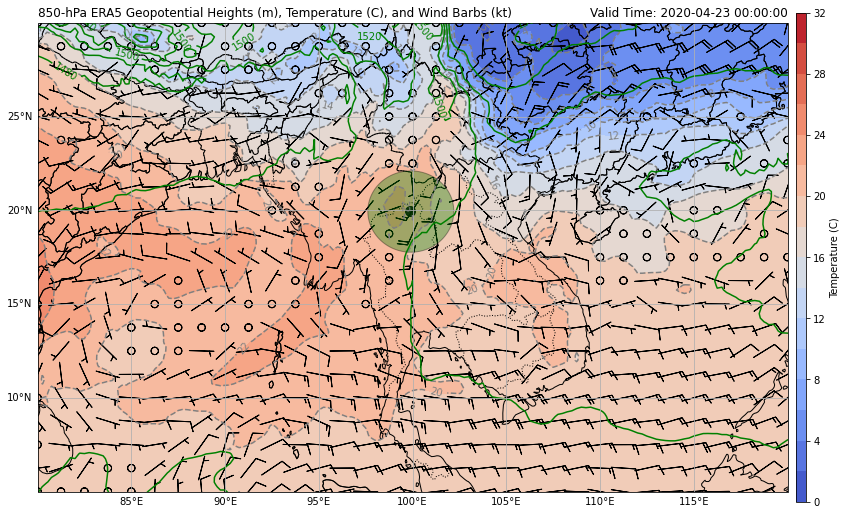

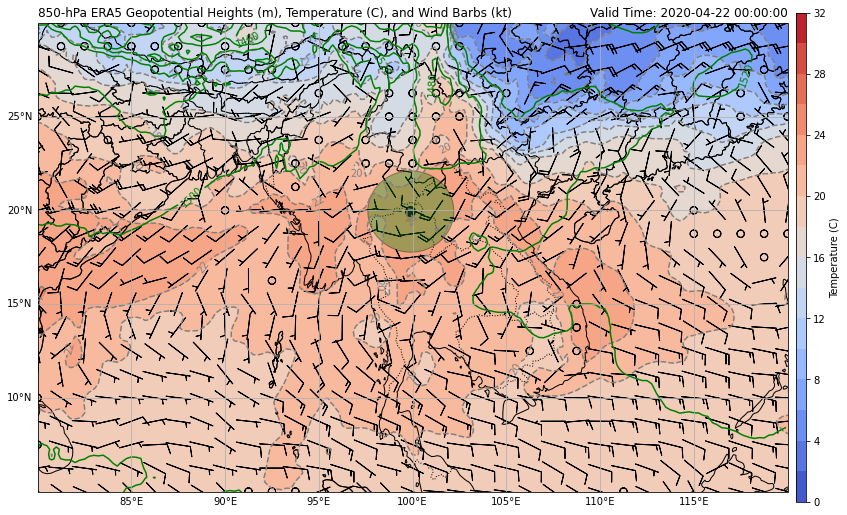

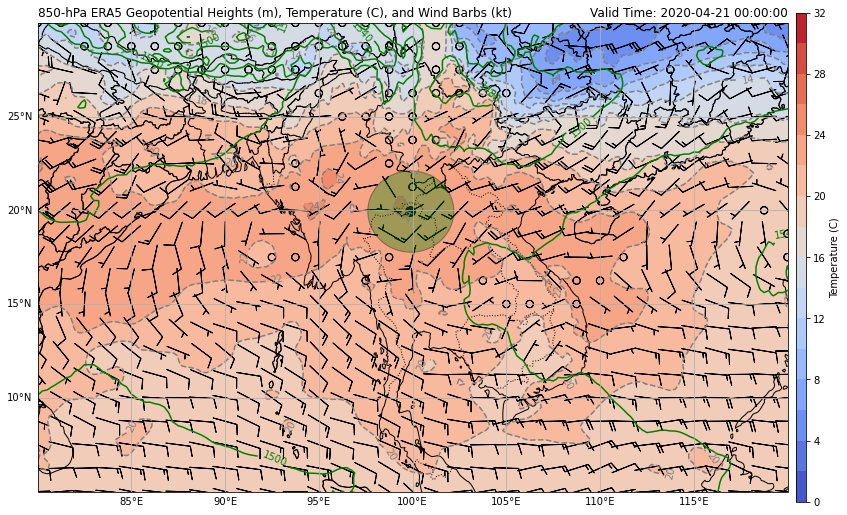

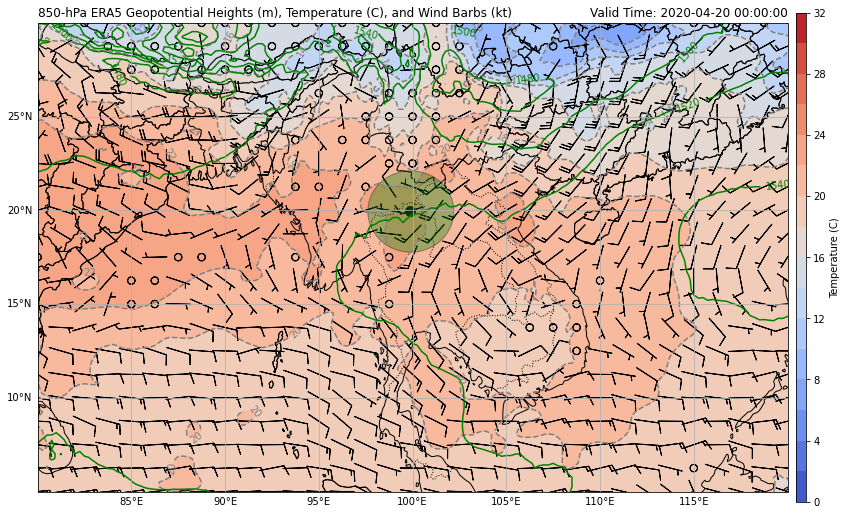

In [6]:
ds = dss.sel(time='2020-04-23')
plot_map(ds, './0output/fig5d.jpg')

ds = dss.sel(time='2020-04-22')
plot_map(ds, './0output/fig5c.jpg')

ds = dss.sel(time='2020-04-21')
plot_map(ds, './0output/fig5b.jpg')

ds = dss.sel(time='2020-04-20')
plot_map(ds, './0output/fig5a.jpg')

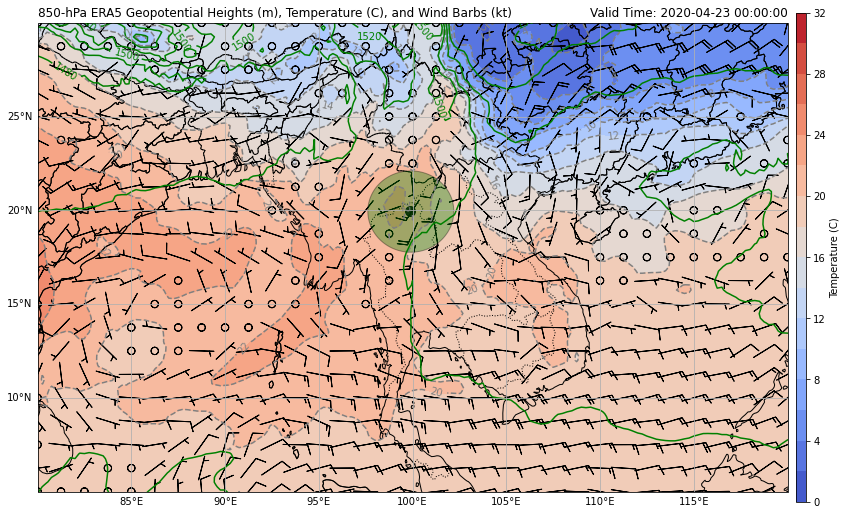

In [8]:
ds = dss.sel(time='2020-04-23')
plot_map(ds, 'test.png')

### อธิบายแผนที่ระดับความกดอากาศ 850 hPa

* อุณหภูมิพื้นผิวในพื้นที่อินโดจีนมีและบริเวณพื้นที่เขตร้อนข้างเคียงมีอุณหภูมิที่สูงกว่า มีหย่อมความร้อนเกิดขึ้นในพื้นที่แผ่นดินตอนใน
* อุณหภูมิในบริเวณพื้นที่ทางตอนใต้และตะวันออกของจีนยังมีอุณหภูมิที่ต่ำเมื่อเทียบกับพื้นที่อินโดจีน
* มีการแผ่ความกดอากาศสูงลงมาทางตอนใต้ ในลักษณะของลมมรสุมฤดูหนาว เป็นระลอก ในขณะที่พื้นที่ในเขตร้อนยังคงมีอุณหภูมิสูงเพิ่มขึ้นจากการเลื่อนขึ้นของแสงอาทิตย์ตั้งฉาก
* ลมใต้พัดหอบความชื้นเข้ามาเป็นหลัก ในขณะที่วันที่ 23 เมษายน พบ antycyclonic อยู่ในบริเวณอ่าวเบงกอล เกิดลมตะวันตกพัดเข้ามายังภาคเหนือของประเทศไทย

